In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv(r'Downloads\Wine.csv')

In [5]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [41]:
#Normalize the dataset
from sklearn.preprocessing import Normalizer
norm=Normalizer()
df_wine = norm.fit_transform(df)

In [43]:
df_wine = pd.DataFrame(df_wine)

In [44]:
df_wine.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.019950,0.003711,0.003644,0.031124,0.151541,0.003444,0.002973,0.000581,0.002396,0.007342,0.001477,0.003993,0.986018
std,0.007321,0.002499,0.001409,0.014671,0.054081,0.001543,0.001802,0.000327,0.001249,0.003843,0.000736,0.001979,0.010073
min,0.008428,0.000944,0.001473,0.007739,0.064147,0.001255,0.000637,0.000145,0.000554,0.002241,0.000579,0.001675,0.951812
25%,0.013548,0.001684,0.002359,0.017615,0.109775,0.002385,0.001746,0.000277,0.001515,0.004612,0.000970,0.002535,0.981687
50%,0.018984,0.003174,0.003468,0.030036,0.146777,0.002946,0.002721,0.000514,0.002030,0.005981,0.001232,0.003384,0.988441
75%,0.024783,0.004981,0.004506,0.040010,0.183082,0.003886,0.003551,0.000833,0.003040,0.008853,0.001834,0.004870,0.993564
max,0.041106,0.014852,0.007305,0.069703,0.297958,0.008404,0.010560,0.002008,0.007469,0.021876,0.004727,0.010858,0.997835


In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df_wine)
x_pca = pca.transform(df_wine)
x_pca.shape

(178, 2)

In [47]:
# displaying the PCA components
pca.components_

array([[ 0.11967376,  0.02493389,  0.02287173,  0.2334577 ,  0.9475191 ,
         0.02006888,  0.01730099,  0.00397612,  0.01438307,  0.02402529,
         0.0098415 ,  0.02579363, -0.17313082],
       [-0.25819916, -0.11280463, -0.06416612, -0.91265935,  0.2604945 ,
        -0.02946121, -0.01570738, -0.01883443, -0.02177346, -0.09869587,
        -0.00852837, -0.0504888 , -0.03715241]])

In [51]:
#KMeans Clustering
ks = range(1,6)
inertia = []
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(df)
    inertia.append(model.inertia_)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [52]:
inertia

[17592296.383508474,
 4543749.614531861,
 2370689.686782969,
 1331903.062263718,
 916379.1871539169]

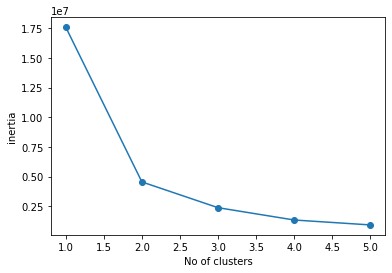

In [54]:
plt.plot(ks,inertia,'-o')
plt.xlabel('No of clusters')
plt.ylabel('inertia')
plt.show()

In [56]:
kmeans = KMeans(n_clusters =2,init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(x_pca)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0])

In [57]:
type(x_pca)

numpy.ndarray

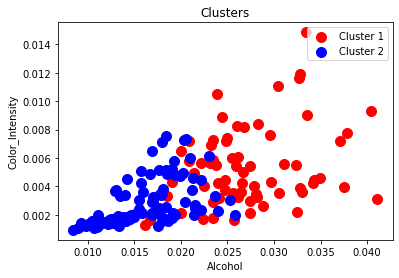

In [58]:
#Thus we create a Hierarchial clustering model
#Now we show it in a graph
#Alchohol vs Color Intensity
X = np.array(df_wine)
plt.scatter(X[y_kmeans == 0, 0 ], X[y_kmeans == 0, 1], s = 100, c= 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0 ], X[y_kmeans == 1, 1], s = 100, c= 'blue', label = 'Cluster 2')
plt.title('Clusters')
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')
plt.legend()
plt.show()

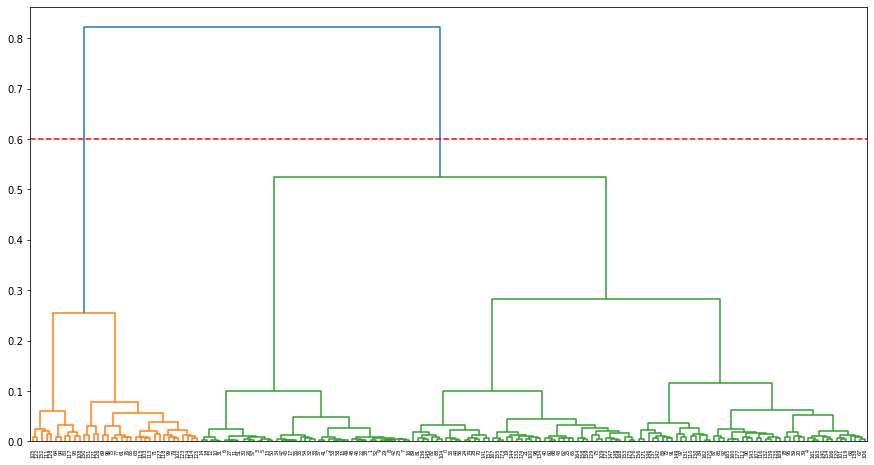

In [62]:
#Normalization
from sklearn.preprocessing import Normalizer
norm=Normalizer()
df_Wine = norm.fit_transform(df)
#Agglomerative Clustering
#Modelling
#In hierachial we can find optimum number of clusters before creating model
#Using dendrogram
from scipy.cluster.hierarchy import dendrogram,linkage
linked = linkage(df_Wine,method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(0.6,0,5000,color='r',linestyle='dashed')
plt.show()

In [63]:
#There will be 2 clusters -optimum number of clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels=cluster.fit_predict(df_Wine)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

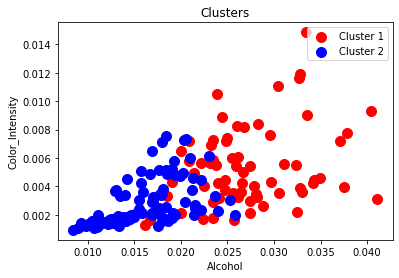

In [64]:
#Thus we create a Hierarchial clustering model
#Now we show it in a graph
#Alchohol vs Color Intensity
X = np.array(df_wine)
plt.scatter(X[y_kmeans == 0, 0 ], X[y_kmeans == 0, 1], s = 100, c= 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0 ], X[y_kmeans == 1, 1], s = 100, c= 'blue', label = 'Cluster 2')
plt.title('Clusters')
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')
plt.legend()
plt.show()

In [65]:
#The given graph shows that Alcohol and color intensity is low
#Comparitively cluster 1 has high alcohol and colour intensity